In [169]:
##  LIBRERIAS  
import os
import numpy as np
import pandas as pd
import re
from unidecode import unidecode
from tqdm.notebook import trange, tqdm
import time
import math

import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon

from mpl_toolkits import mplot3d
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.max_columns', 50)


## LECTURA ... Df Parametros
par_file_name="CLAG1.par"

#print(open(par_file_name, "r").read())
open(par_file_name, "r").close()
l=[re.split("[']", x) for x in open(par_file_name, "r")]
#print(x)
open(par_file_name, "r").close()            #cerrar archivo 
## diccionario de parámetros
param={}
param_l=[]
paran_v=[]

## OJO!! 
# Separador no es el mismo en todos los SO -->  Usar OS

## header:          PARÁMETRO 1
param[1]=l[0][0].strip()
param_l.append(l[0][1].strip().replace(os.sep,""))
## input file:          PARÁMETRO 2
param[2]=l[1][0].strip().rsplit(os.sep, 1)[-1]
param_l.append(l[1][1].strip().replace(os.sep,""))
## columns for data:          PARÁMETRO 3
param[3]=[int(x) for x in l[2][0].strip().split(",")]
param_l.append(l[2][1].strip().replace(os.sep,"")[0:16])
## initial search volume:          PARÁMETRO 4
param[4]=[float(x) for x in l[3][0].strip().split(",")]
param_l.append(l[3][1].strip().replace(os.sep,""))
## Number of Risk Thresholds:          PARÁMETRO 5
param[5]=[int(x) for x in l[4][0].strip().split(",")]
param_l.append(l[4][1].strip().replace(os.sep,"")[0:37])
## Selected risk thresholds:          PARÁMETRO 6
param[6]=[float(x) for x in l[5][0].strip().split(",")]
param_l.append(l[5][1].strip().replace(os.sep,""))
## Number of data in local volume:          PARÁMETRO 7
param[7]=[int(x) for x in l[6][0].strip().split(",")]
param_l.append(l[6][1].strip().replace(os.sep,""))
## Number of units:          PARÁMETRO 8
param[8]=[int(x) for x in l[7][0].strip().split(",")]
param_l.append(l[7][1].strip().replace(os.sep,""))
## Unit names:          PARÁMETRO 9
param[9]=[int(x) for x in l[8][0].strip().split(",")]
param_l.append(l[8][1].strip().replace(os.sep,""))
## not consider values less than:          PARÁMETRO 10
param[10]=[int(x) for x in l[9][0].strip().split(",")]
param_l.append(l[9][1].strip().replace(os.sep,""))
## output files name:          PARÁMETRO 11
param[11]=l[10][0].strip().rsplit(os.sep, 1)[-1]
param_l.append(l[10][1].strip().replace(os.sep,""))
## number of zones:          PARÁMETRO 12
param[12]=[int(x) for x in l[11][0].strip().split(",")]
param_l.append(l[11][1].strip().replace(os.sep,""))
## zone identifiers:          PARÁMETRO 13
param[13]=[int(x) for x in l[12][0].strip().split(",")]
param_l.append(l[12][1].strip().replace(os.sep,""))
## azimuth of search orientation per zone :          PARÁMETRO 14
param[14]=[int(x) for x in l[13][0].strip().split(",")]
param_l.append(l[13][1].strip().replace(os.sep,""))
## Anisotropy ratios:          PARÁMETRO 15
param[15]=[float(x) for x in l[14][0].strip().split(",")]
param_l.append(l[14][1].strip().replace(os.sep,""))
## Exclude data from the same drillhole:          PARÁMETRO 16
param[16]=[int(x) for x in l[15][0].strip().split(",")]
param_l.append(l[15][1].strip().replace(os.sep,""))
## Option to weight data by search expansion:          PARÁMETRO 17
param[17]=[int(x) for x in l[16][0].strip().split(",")]
param_l.append(l[16][1].strip().replace(os.sep,""))

df_parametros = pd.DataFrame(list(zip(list(range(1,18)), param_l, list(param.values()))),
                            columns=['Orden','Descripcion', 'Valor']
                        )


#df_parametros

df_CLAG_MR_2022 = pd.read_csv(param[2])
df_CLAG_MR_2022.head(2)
## Requerimiento: No NaN ni missing values
'''
Algoritmo localcapping no admite valores nulos ni missings
función missing_val(df) identifica casos missing y nulos
'''

if df_CLAG_MR_2022.isnull().any().any()==False:
    print("No hay valores nulos")
else:
    print("Hay valores nulos")


No hay valores nulos


In [170]:
df_CLAG_MR_2022

,COUNT,mid_x,mid_y,mid_z,Ag_ppm_BESTEL,NBKRT,AG_SUBZONAS,HOLEID
0,2336,4072.2950,4850.2450,4199.8669,25.146513,32,42,A019
1,2337,4073.5668,4848.7522,4196.7885,40.000000,31,42,A019
2,2338,4074.6121,4847.5252,4194.2584,35.799999,31,42,A019
3,2339,4075.6575,4846.2982,4191.7282,44.693333,31,42,A019
4,2340,4076.7028,4845.0713,4189.1980,45.193333,31,42,A019
...,...,...,...,...,...,...,...,...
4250,390969,4234.5329,5190.9378,4185.3258,7.000000,31,42,A913
4251,390970,4234.9222,5190.5647,4181.7917,7.457831,31,42,A913
4252,390971,4235.3126,5190.1954,4178.2573,8.333333,31,42,A913
4253,394849,3690.3063,4739.9698,4152.7452,122.400002,32,41,A951


In [171]:
float_dataframe_round=0

df_CLAG_MR_2022=df_CLAG_MR_2022.set_index('COUNT')
df_CLAG_MR_2022.iloc[:, :4]=df_CLAG_MR_2022.iloc[:, :4].round(float_dataframe_round)


df_CLAG_MR_2022["x_rot"]=0
df_CLAG_MR_2022["y_rot"]=0
df_CLAG_MR_2022["z_rot"]=0

df_CLAG_MR_2022["CAP1_P"]=df_CLAG_MR_2022.iloc[:,3]
df_CLAG_MR_2022["CPD1_P"]=0
df_CLAG_MR_2022["CAP2_P"]=df_CLAG_MR_2022.iloc[:,3]
df_CLAG_MR_2022["CPD2_P"]=0
df_CLAG_MR_2022["CAP3_P"]=df_CLAG_MR_2022.iloc[:,3]
df_CLAG_MR_2022["CPD3_P"]=0
df_CLAG_MR_2022["CAP4_P"]=df_CLAG_MR_2022.iloc[:,3]
df_CLAG_MR_2022["CPD4_P"]=0
df_CLAG_MR_2022["CAP5_P"]=df_CLAG_MR_2022.iloc[:,3]
df_CLAG_MR_2022["CPD5_P"]=0
df_CLAG_MR_2022["CAP6_P"]=df_CLAG_MR_2022.iloc[:,3]
df_CLAG_MR_2022["CPD6_P"]=0

df_CLAG_MR_2022["AVG_SN_P"]=0
df_CLAG_MR_2022["AVG_CN_P"]=0

df_CLAG_MR_2022["PROP_SN_P"]=0
df_CLAG_MR_2022["PROP_CN_P"]=0

df_CLAG_MR_2022["EVAL_P"]=0
df_CLAG_MR_2022["NCOMP_P"]=0
df_CLAG_MR_2022["NXPAN_P"]=0


In [172]:
df_CLAG_MR_2022.head(2)

,mid_x,mid_y,mid_z,Ag_ppm_BESTEL,NBKRT,AG_SUBZONAS,HOLEID,x_rot,y_rot,z_rot,CAP1_P,CPD1_P,CAP2_P,CPD2_P,CAP3_P,CPD3_P,CAP4_P,CPD4_P,CAP5_P,CPD5_P,CAP6_P,CPD6_P,AVG_SN_P,AVG_CN_P,PROP_SN_P,PROP_CN_P,EVAL_P,NCOMP_P,NXPAN_P
COUNT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2336,4072.0,4850.0,4200.0,25.0,32,42,A019,0,0,0,25.0,0,25.0,0,25.0,0,25.0,0,25.0,0,25.0,0,0,0,0,0,0,0,0
2337,4074.0,4849.0,4197.0,40.0,31,42,A019,0,0,0,40.0,0,40.0,0,40.0,0,40.0,0,40.0,0,40.0,0,0,0,0,0,0,0,0


In [226]:

zonas = df_parametros.Valor[12]
rocks=df_parametros.Valor[8]
iterador=0      ##  PARA SIGNAR RATIO x ZONA

expansiones_max=10
parametro_expansion=0.25
float_hemi_accuracy=2

float_dataframe_round=2     ## redondeo en dataframe

flag_drillhole=df_parametros.Valor[15][0] ### = 1 EXCLUDE SAME DRILLHOLE

freno_1_composito_x_roca=0  ###  SOLO LEER UN SOLO COMPOSITO POR COMBINACION ROCA/ZONA
freno_2_roca_x_zona=0  ###  SOLO LEER UNA SOLA ROCA POR ZONA
freno_3_zona=0    ### SOLO LEER UNICA ZONA
hemi_axis_x, hemi_axis_y, hemi_axis_z = [], [], []
axis_x, axis_y, axis_z = [], [], []


elipsoide_on=1     # activar o desactivar elipsoide,  en defecto activa paralelepipedo


for zone in zonas:  
    print("\n")
    print("zone:",zone)
    print(" ")  
    azimuth=df_parametros.Valor[13][iterador]
    print(" azimuth:",azimuth)
    if azimuth < 90:
        cartesiana=90-azimuth 
    elif azimuth < 180:
        cartesiana=360-(azimuth-90) 
    elif azimuth < 270:
        cartesiana=270-(azimuth-180) 
    elif azimuth < 360:
        cartesiana=180-(azimuth-270) 
    print(" cartesiana:",cartesiana)
    ratio=df_parametros.Valor[14][iterador]
    print(" ratio anisotropia:",ratio)
    

    ###
    # PARAMETROS EXPANSION    ELIPSOIDE
    for i in range(expansiones_max):       #  30*30*30       30*75*30
        # print((df_parametros.Valor[3][0] / 2)*((1+parametro_expansion)**i))
        # print(((df_parametros.Valor[3][1]*ratio) / 2)*((1+parametro_expansion)**i))
        # print((df_parametros.Valor[3][2] / 2)*((1+parametro_expansion)**i))
        # print((df_parametros.Valor[3][0] / 2)*((1+parametro_expansion)**i)*2)
        # print(((df_parametros.Valor[3][1]*ratio) / 2)*((1+parametro_expansion)**i)*2)
        # print((df_parametros.Valor[3][2] / 2)*((1+parametro_expansion)**i)*2)
        # print(" ")
        semi_x=(df_parametros.Valor[3][0] / 2)*((1+parametro_expansion)**i)
        semi_y=((df_parametros.Valor[3][1]*ratio) / 2)*((1+parametro_expansion)**i)
        semi_z=(df_parametros.Valor[3][2] / 2)*((1+parametro_expansion)**i)
        hemi_axis_x.append(round(semi_x,float_hemi_accuracy))
        hemi_axis_y.append(round(semi_y,float_hemi_accuracy))
        hemi_axis_z.append(round(semi_z,float_hemi_accuracy))
        axis_x.append(round(semi_x*2,float_hemi_accuracy))
        axis_y.append(round(semi_y*2,float_hemi_accuracy))
        axis_z.append(round(semi_z*2,float_hemi_accuracy))
        #print(semi_x*2,semi_y*2,semi_z*2)
        # print(hemi_axis_x,hemi_axis_y,hemi_axis_z)
        # print(" ")
    print(" hemi_exis:",hemi_axis_x,hemi_axis_y,hemi_axis_z)
    ###

    
    for rock in rocks:
        print("\n")
        print("    rock:",rock)
        print("    zone:",zone)
        print('\n')


        theta = np.deg2rad(cartesiana) 
        rot_matrix = np.array([
            [np.cos(theta), -np.sin(theta), 0],
            [np.sin(theta), np.cos(theta), 0],
            [0, 0, 1]])
        
        
        df=df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 4] == rock) & (df_CLAG_MR_2022.iloc[:, 5] == zone)]

        for i, row in df.iterrows():
            rotated_coords = np.dot([row['mid_x'], row['mid_y'], row['mid_z']], rot_matrix)
            
            df_CLAG_MR_2022.at[i, 'x_rot'] = rotated_coords[0]
            df_CLAG_MR_2022.at[i, 'y_rot'] = rotated_coords[1]
            df_CLAG_MR_2022.at[i, 'z_rot'] = rotated_coords[2]


        
        
        for index, row in df.iterrows():
            x=row['x_rot']
            y=row['y_rot']
            z=row['z_rot']

            xr=row['mid_x']
            yr=row['mid_y']
            zr=row['mid_z']
            
            hole=row.iloc[6]
            ley=row.iloc[3]
            print("        ID:", index)
            print("         x:", x)
            print("         y:", y)
            print("         z:", z)
            print("         xr:", xr)
            print("         yr:", yr)
            print("         zr:", zr)
            
            print("         hole:", hole)
            print("         ley:", ley)
            print(" ")

            index_inner=[]
            ley_inner=[]
            hole_inner=[]

            for i in range(expansiones_max):
                print(" ")
                print("        expansion: ",i)
                print(" ")

                print(hemi_axis_x[i],
                      hemi_axis_y[i],
                      hemi_axis_z[i])
                
                a=hemi_axis_x[i]
                b=hemi_axis_y[i]
                c=hemi_axis_z[i]

                aa=axis_x[i]
                bb=axis_y[i]
                cc=axis_z[i]

                m_ai=x-a
                m_as=x+a
                m_bi=y-b
                m_bs=y+b
                m_ci=z-c
                m_cs=z+c

                for subindex, subrow in df.iterrows():
                    sx=subrow['x_rot']
                    sy=subrow['y_rot']
                    sz=subrow['z_rot']
                    # print("            ID sub:", subindex)
                    # print("             x sub:", subrow['x_rot'])
                    # print("             y sub:", subrow['y_rot'])
                    # print("             z sub:", subrow['z_rot'])
                    # print("             hole sub:", subrow.iloc[6])
                    # print("             ley sub:", subrow.iloc[3])
                    # print(" ")

                    if elipsoide_on==1:
                        if (((sx-x)**2)/(aa**2) + ((sy-y)**2)/(bb**2) + ((sz-z)**2)/(cc**2)) <= 1:
                            print("             dentro de elipsode")
                            if flag_drillhole==1:
                                print("             flag_drillhole:",flag_drillhole)
                                if hole!=subrow.iloc[6]:
                                    index_inner.append(subindex)
                            else:
                                index_inner.append(subindex)

                    else:
                        if m_ai < subrow['x_rot'] < m_as and m_bi < subrow['y_rot'] < m_bs and m_ci < subrow['z_rot'] < m_cs:
                            print("             dentro de cubo")
                            if flag_drillhole==1:
                                print("             flag_drillhole:",flag_drillhole)
                                if hole!=subrow.iloc[6]:
                                    index_inner.append(subindex)
                            else:
                                index_inner.append(subindex)

                if len(index_inner) > 20:   
                    print(" ")
                    print("             index_inner:",index_inner)
                    print("             len index_inner:",len(index_inner))         
                    print(" ")
                    break    

                #index_inner.insert(0,index)
                #print(" ")
                #print("             index_inner:",index_inner)

                inner_df = df.loc[index_inner]
                inner_df['dist'] = np.sqrt((inner_df['x_rot'] - x)**2 + (inner_df['y_rot'] - y)**2 + (inner_df['z_rot'] - z)**2)
                inner_df = inner_df.sort_values(by=['dist'])
                inner_df = inner_df.iloc[:20]








            freno_1_composito_x_roca=freno_1_composito_x_roca+1
            if freno_1_composito_x_roca>4:
                break
        freno_2_roca_x_zona=freno_2_roca_x_zona+1
        if freno_2_roca_x_zona>0:
            break
    freno_3_zona=freno_3_zona+1
    if freno_3_zona>0:
        break
    iterador=iterador+1


    print(" ")
    print(" ")






zone: 41
 
 azimuth: 140
 cartesiana: 310
 ratio anisotropia: 2.5
 hemi_exis: [15.0, 18.75, 23.44, 29.3, 36.62, 45.78, 57.22, 71.53, 89.41, 111.76] [37.5, 46.88, 58.59, 73.24, 91.55, 114.44, 143.05, 178.81, 223.52, 279.4] [15.0, 18.75, 23.44, 29.3, 36.62, 45.78, 57.22, 71.53, 89.41, 111.76]


    rock: 31
    zone: 41


        ID: 6586
         x: -1269.6939018535477
         y: 5223.12190127666
         z: 4116
         xr: 3185.0
         yr: 4330.0
         zr: 4116.0
         hole: A055
         ley: 1.0
 
 
        expansion:  0
 
15.0 37.5 15.0
             dentro de elipsode
             flag_drillhole: 1
             dentro de elipsode
             flag_drillhole: 1
             dentro de elipsode
             flag_drillhole: 1
             dentro de elipsode
             flag_drillhole: 1
             dentro de elipsode
             flag_drillhole: 1
 
        expansion:  1
 
18.75 46.88 18.75
             dentro de elipsode
             flag_drillhole: 1
             dentr

In [225]:
inner_df

,mid_x,mid_y,mid_z,Ag_ppm_BESTEL,NBKRT,AG_SUBZONAS,HOLEID,x_rot,y_rot,z_rot,CAP1_P,CPD1_P,CAP2_P,CPD2_P,CAP3_P,CPD3_P,CAP4_P,CPD4_P,CAP5_P,CPD5_P,CAP6_P,CPD6_P,AVG_SN_P,AVG_CN_P,PROP_SN_P,PROP_CN_P,EVAL_P,NCOMP_P,NXPAN_P,dist
COUNT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30576,3206.0,4304.0,4119.0,5.0,31,41,A1229,-1236.278207,5222.496357,4119,5.0,0,5.0,0,5.0,0,5.0,0,5.0,0,5.0,0,0,0,0,0,0,0,0,26.038433
30576,3206.0,4304.0,4119.0,5.0,31,41,A1229,-1236.278207,5222.496357,4119,5.0,0,5.0,0,5.0,0,5.0,0,5.0,0,5.0,0,0,0,0,0,0,0,0,26.038433
30576,3206.0,4304.0,4119.0,5.0,31,41,A1229,-1236.278207,5222.496357,4119,5.0,0,5.0,0,5.0,0,5.0,0,5.0,0,5.0,0,0,0,0,0,0,0,0,26.038433
30576,3206.0,4304.0,4119.0,5.0,31,41,A1229,-1236.278207,5222.496357,4119,5.0,0,5.0,0,5.0,0,5.0,0,5.0,0,5.0,0,0,0,0,0,0,0,0,26.038433
30576,3206.0,4304.0,4119.0,5.0,31,41,A1229,-1236.278207,5222.496357,4119,5.0,0,5.0,0,5.0,0,5.0,0,5.0,0,5.0,0,0,0,0,0,0,0,0,26.038433
30575,3206.0,4303.0,4121.0,9.0,31,41,A1229,-1235.512162,5221.853569,4121,9.0,0,9.0,0,9.0,0,9.0,0,9.0,0,9.0,0,0,0,0,0,0,0,0,27.658633
30575,3206.0,4303.0,4121.0,9.0,31,41,A1229,-1235.512162,5221.853569,4121,9.0,0,9.0,0,9.0,0,9.0,0,9.0,0,9.0,0,0,0,0,0,0,0,0,27.658633
30575,3206.0,4303.0,4121.0,9.0,31,41,A1229,-1235.512162,5221.853569,4121,9.0,0,9.0,0,9.0,0,9.0,0,9.0,0,9.0,0,0,0,0,0,0,0,0,27.658633
30575,3206.0,4303.0,4121.0,9.0,31,41,A1229,-1235.512162,5221.853569,4121,9.0,0,9.0,0,9.0,0,9.0,0,9.0,0,9.0,0,0,0,0,0,0,0,0,27.658633


In [212]:
(row['x_rot']**2)/(subrow['x_rot']**2)

0.8414230298280867

In [75]:
df_CLAG_MR_2022
df_CLAG_MR_2022iloc[:, [1, 3]] = df_CLAG_MR_2022iloc[:, [1, 3]].round(2)
iloc[:, [1, 3]]

NameError: name 'df_CLAG_MR_2022iloc' is not defined

In [208]:
(subrow['x_rot']**2)/(aa**2) 

169.95390123788187

In [10]:
df_CLAG_MR_2022

,mid_x,mid_y,mid_z,Ag_ppm_BESTEL,NBKRT,AG_SUBZONAS,HOLEID
COUNT,,,,,,,
2336,4072.30,4850.24,4199.87,25.15,32,42,A019
2337,4073.57,4848.75,4196.79,40.00,31,42,A019
2338,4074.61,4847.53,4194.26,35.80,31,42,A019
2339,4075.66,4846.30,4191.73,44.69,31,42,A019
2340,4076.70,4845.07,4189.20,45.19,31,42,A019
...,...,...,...,...,...,...,...
390969,4234.53,5190.94,4185.33,7.00,31,42,A913
390970,4234.92,5190.56,4181.79,7.46,31,42,A913
390971,4235.31,5190.20,4178.26,8.33,31,42,A913


In [ ]:
df_vvv = df.loc[df['xxx'] == 'ccccc']
print(df_vvv)

In [51]:
df

,mid_x,mid_y,mid_z,Ag_ppm_BESTEL,NBKRT,AG_SUBZONAS,HOLEID,CAP1_P,CPD1_P,CAP2_P,CPD2_P,CAP3_P,CPD3_P,CAP4_P,CPD4_P,CAP5_P,CPD5_P,CAP6_P,CPD6_P
COUNT,,,,,,,,,,,,,,,,,,,
6586,3185.36,4329.87,4116.01,0.83,31,41,A055,0.83,0,0.83,0,0.83,0,0.83,0,0.83,0,0.83,0
6587,3187.25,4327.83,4113.65,2.00,31,41,A055,2.00,0,2.00,0,2.00,0,2.00,0,2.00,0,2.00,0
6588,3188.84,4326.12,4111.68,10.20,31,41,A055,10.20,0,10.20,0,10.20,0,10.20,0,10.20,0,10.20,0
6589,3190.40,4324.44,4109.75,7.30,31,41,A055,7.30,0,7.30,0,7.30,0,7.30,0,7.30,0,7.30,0
6590,3191.77,4322.95,4108.04,35.71,31,41,A055,35.71,0,35.71,0,35.71,0,35.71,0,35.71,0,35.71,0


In [47]:
df_CLAG_MR_2022[(df_CLAG_MR_2022.iloc[:, 4] == rock) & (df_CLAG_MR_2022.iloc[:, 5] == zone)]

,mid_x,mid_y,mid_z,Ag_ppm_BESTEL,NBKRT,AG_SUBZONAS,HOLEID,CAP1_P,CPD1_P,CAP2_P,CPD2_P,CAP3_P,CPD3_P,CAP4_P,CPD4_P,CAP5_P,CPD5_P,CAP6_P,CPD6_P
COUNT,,,,,,,,,,,,,,,,,,,
6586,3185.36,4329.87,4116.01,0.83,31,41,A055,0.83,0,0.83,0,0.83,0,0.83,0,0.83,0,0.83,0
6587,3187.25,4327.83,4113.65,2.00,31,41,A055,2.00,0,2.00,0,2.00,0,2.00,0,2.00,0,2.00,0
6588,3188.84,4326.12,4111.68,10.20,31,41,A055,10.20,0,10.20,0,10.20,0,10.20,0,10.20,0,10.20,0
6589,3190.40,4324.44,4109.75,7.30,31,41,A055,7.30,0,7.30,0,7.30,0,7.30,0,7.30,0,7.30,0
6590,3191.77,4322.95,4108.04,35.71,31,41,A055,35.71,0,35.71,0,35.71,0,35.71,0,35.71,0,35.71,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386872,3625.08,4814.78,4040.84,74.00,31,41,A858,74.00,0,74.00,0,74.00,0,74.00,0,74.00,0,74.00,0
386873,3626.33,4813.62,4038.38,35.00,31,41,A858,35.00,0,35.00,0,35.00,0,35.00,0,35.00,0,35.00,0
386874,3627.58,4812.46,4035.91,17.80,31,41,A858,17.80,0,17.80,0,17.80,0,17.80,0,17.80,0,17.80,0


In [82]:
axs=np.array([30,75,30])
for u in range(5):
    print(axs*(1+parametro_expansion)**u)

[30. 75. 30.]
[37.5  93.75 37.5 ]
[ 46.875  117.1875  46.875 ]
[ 58.59375  146.484375  58.59375 ]
[ 73.2421875  183.10546875  73.2421875 ]


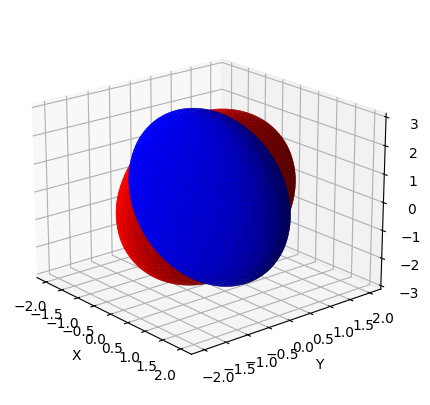

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generamos el primer elipsoide
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

a1 = 1 # Radio del eje en x
b1 = 2 # Radio del eje en y
c1 = 3 # Radio del eje en z

x1 = a1 * np.outer(np.cos(u), np.sin(v))
y1 = b1 * np.outer(np.sin(u), np.sin(v))
z1 = c1 * np.outer(np.ones(np.size(u)), np.cos(v))

# Generamos el segundo elipsoide
a2 = 2 # Radio del eje en x
b2 = 1 # Radio del eje en y
c2 = 3 # Radio del eje en z

x2 = a2 * np.outer(np.cos(u), np.sin(v))
y2 = b2 * np.outer(np.sin(u), np.sin(v))
z2 = c2 * np.outer(np.ones(np.size(u)), np.cos(v))

# Creamos la figura y el subplot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

# Graficamos los dos elipsoides en el mismo subplot
ax.plot_surface(x1, y1, z1, color='r')
ax.plot_surface(x2, y2, z2, color='b')

# Configuramos los ejes y la vista de la figura
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=20, azim=-40)

# Mostramos la figura con ambos elipsoides
plt.show()



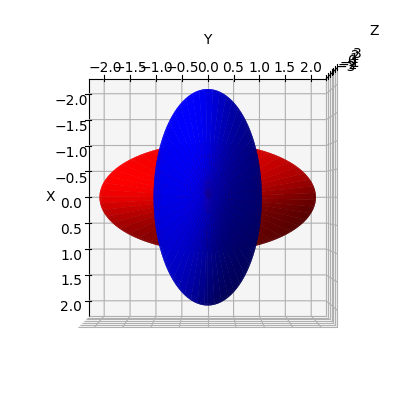

: 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generamos el primer elipsoide
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

a1 = 1 # Radio del eje en x
b1 = 2 # Radio del eje en y
c1 = 3 # Radio del eje en z

x1 = a1 * np.outer(np.cos(u), np.sin(v))
y1 = b1 * np.outer(np.sin(u), np.sin(v))
z1 = c1 * np.outer(np.ones(np.size(u)), np.cos(v))

# Generamos el segundo elipsoide
a2 = 2 # Radio del eje en x
b2 = 1 # Radio del eje en y
c2 = 3 # Radio del eje en z

x2 = a2 * np.outer(np.cos(u), np.sin(v))
y2 = b2 * np.outer(np.sin(u), np.sin(v))
z2 = c2 * np.outer(np.ones(np.size(u)), np.cos(v))

# Creamos la figura y el subplot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

# Graficamos los dos elipsoides en el mismo subplot
ax.plot_surface(x1, y1, z1, color='r')
ax.plot_surface(x2, y2, z2, color='b')

# Configuramos los ejes y la vista de la figura
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=90, azim=0)

# Mostramos la figura con ambos elipsoides
plt.show()


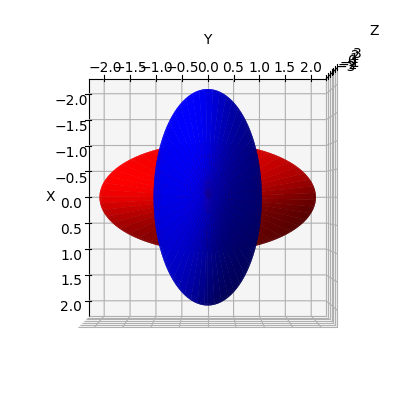

In [2]:
## hola copilot, quiero la funcion que genere un elipsoide y luego lo reote 15 grados en el eje z

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generamos el primer elipsoide
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

a1 = 1 # Radio del eje en x
b1 = 2 # Radio del eje en y
c1 = 3 # Radio del eje en z

x1 = a1 * np.outer(np.cos(u), np.sin(v))
y1 = b1 * np.outer(np.sin(u), np.sin(v))
z1 = c1 * np.outer(np.ones(np.size(u)), np.cos(v))

# Generamos el segundo elipsoide
a2 = 2 # Radio del eje en x
b2 = 1 # Radio del eje en y
c2 = 3 # Radio del eje en z

x2 = a2 * np.outer(np.cos(u), np.sin(v))
y2 = b2 * np.outer(np.sin(u), np.sin(v))
z2 = c2 * np.outer(np.ones(np.size(u)), np.cos(v))

# Creamos la figura y el subplot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

# Graficamos los dos elipsoides en el mismo subplot
ax.plot_surface(x1, y1, z1, color='r')
ax.plot_surface(x2, y2, z2, color='b')

# Configuramos los ejes y la vista de la figura
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=90, azim=0)

# Mostramos la figura con ambos elipsoides
plt.show()


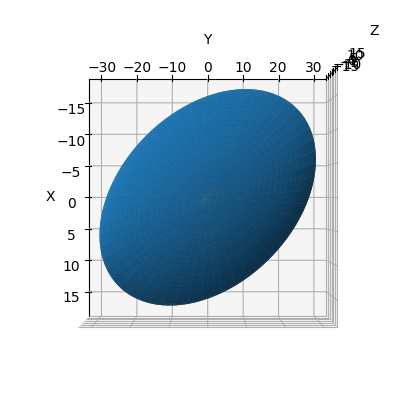

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir el punto central
x0, y0, z0 = 0, 0, 0  # por ejemplo, centro en el origen

# Definir los radios del elipsoide
a, b, c = 15, 30, 15

# Generar los puntos en una malla de coordenadas
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = a * np.outer(np.cos(u), np.sin(v))
y = b * np.outer(np.sin(u), np.sin(v))
z = c * np.outer(np.ones(np.size(u)), np.cos(v))

# Rotar el elipsoide 15 grados en el eje z
theta = np.deg2rad(15)
Rz = np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]])
x, y, z = np.dot(Rz, np.array([x.flatten(), y.flatten(), z.flatten()]))

# Trasladar el elipsoide al punto central
x += x0
y += y0
z += z0

# Crear la figura y el subplot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

# Graficar el elipsoide
ax.plot_surface(x.reshape((100, 100)), y.reshape((100, 100)), z.reshape((100, 100)))

# Configurar los ejes y la vista de la figura
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=90, azim=0)

# Mostrar la figura
plt.show()


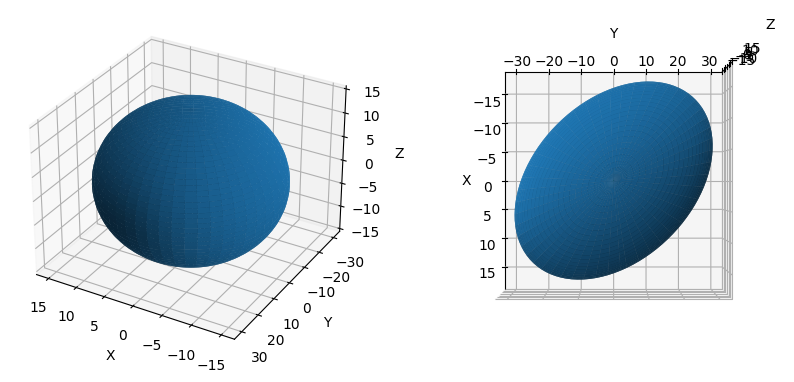

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir el punto central
x0, y0, z0 = 0, 0, 0  # por ejemplo, centro en el origen

# Definir los radios del elipsoide sin rotar
a1, b1, c1 = 15, 30, 15

# Generar los puntos en una malla de coordenadas
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x1 = a1 * np.outer(np.cos(u), np.sin(v))
y1 = b1 * np.outer(np.sin(u), np.sin(v))
z1 = c1 * np.outer(np.ones(np.size(u)), np.cos(v))

# Crear la figura y el subplot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121, projection='3d')

# Graficar el elipsoide sin rotar
ax.plot_surface(x1, y1, z1)

# Configurar los ejes y la vista de la figura
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=30, azim=120)

# Definir los radios del elipsoide rotado
a2, b2, c2 = 15, 30, 15

# Generar los puntos en una malla de coordenadas
x2 = a2 * np.outer(np.cos(u), np.sin(v))
y2 = b2 * np.outer(np.sin(u), np.sin(v))
z2 = c2 * np.outer(np.ones(np.size(u)), np.cos(v))

# Rotar el elipsoide 15 grados en el eje z
theta = np.deg2rad(15)
Rz = np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]])
x2, y2, z2 = np.dot(Rz, np.array([x2.flatten(), y2.flatten(), z2.flatten()]))

# Trasladar el elipsoide al punto central
x2 += x0
y2 += y0
z2 += z0

# Graficar el elipsoide rotado
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x2.reshape((100, 100)), y2.reshape((100, 100)), z2.reshape((100, 100)))

# Configurar los ejes y la vista de la figura
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=90, azim=0)

# Mostrar la figura
plt.show()


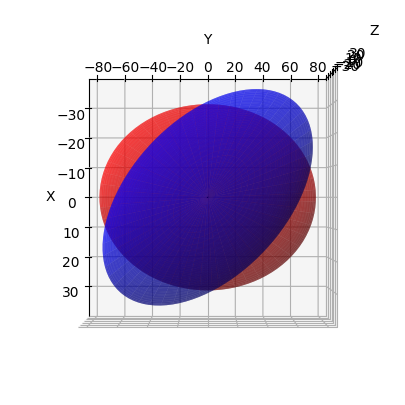

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Definimos el punto central
punto_central = np.array([0,0,0])

# Definimos el tamaño del primer elipsoide
a1, b1, c1 = 30,75,30

# Generamos el primer elipsoide sin rotación
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x1 = a1 * np.outer(np.cos(u), np.sin(v)) + punto_central[0]
y1 = b1 * np.outer(np.sin(u), np.sin(v)) + punto_central[1]
z1 = c1 * np.outer(np.ones(np.size(u)), np.cos(v)) + punto_central[2]

# Definimos el tamaño del segundo elipsoide
a2, b2, c2 = 30,75,30

# Generamos el segundo elipsoide con rotación de 15 grados en el eje z
theta = np.deg2rad(15)
rot_mat = np.array([[np.cos(theta), -np.sin(theta), 0],
                    [np.sin(theta), np.cos(theta), 0],
                    [0, 0, 1]])

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x2 = a2 * np.outer(np.cos(u), np.sin(v))
y2 = b2 * np.outer(np.sin(u), np.sin(v))
z2 = c2 * np.outer(np.ones(np.size(u)), np.cos(v))

x2, y2, z2 = np.dot(rot_mat, np.array([x2.flatten(), y2.flatten(), z2.flatten()]))
x2 = x2.reshape((100, 100)) + punto_central[0]
y2 = y2.reshape((100, 100)) + punto_central[1]
z2 = z2.reshape((100, 100)) + punto_central[2]

# Creamos la figura y el subplot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

# Graficamos los dos elipsoides en el mismo subplot
ax.plot_surface(x1, y1, z1, color='r', alpha=0.5)
ax.plot_surface(x2, y2, z2, color='b', alpha=0.5)

# Configuramos los ejes y la vista de la figura
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=90, azim=0)

# Mostramos la figura con ambos elipsoides
plt.show()


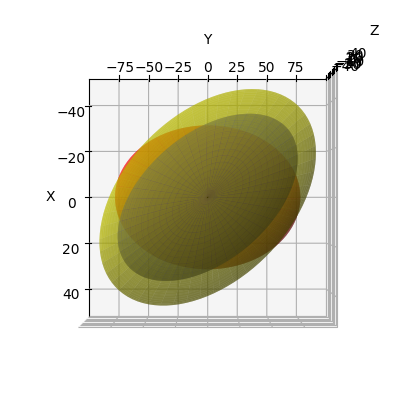

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

gen=100 ###  generador de puntos ELIPSOIDE
rotax=15  ### rotacion en el eje z

# Definimos el punto central
punto_central = np.array([0,0,0])

# Definimos el tamaño del primer elipsoide
a1, b1, c1 = 30,75,30

# Generamos el primer elipsoide sin rotación
u = np.linspace(0, 2 * np.pi, gen)
v = np.linspace(0, np.pi, gen)

x1 = a1 * np.outer(np.cos(u), np.sin(v)) + punto_central[0]
y1 = b1 * np.outer(np.sin(u), np.sin(v)) + punto_central[1]
z1 = c1 * np.outer(np.ones(np.size(u)), np.cos(v)) + punto_central[2]

# Definimos el tamaño del segundo elipsoide
a2, b2, c2 = 30,75,30

# Generamos el segundo elipsoide con rotación de 15 grados en el eje z
theta = np.deg2rad(rotax)
rot_mat = np.array([[np.cos(theta), -np.sin(theta), 0],
                    [np.sin(theta), np.cos(theta), 0],
                    [0, 0, 1]])

u = np.linspace(0, 2 * np.pi, gen)
v = np.linspace(0, np.pi, gen)

x2 = a2 * np.outer(np.cos(u), np.sin(v))
y2 = b2 * np.outer(np.sin(u), np.sin(v))
z2 = c2 * np.outer(np.ones(np.size(u)), np.cos(v))

x2, y2, z2 = np.dot(rot_mat, np.array([x2.flatten(), y2.flatten(), z2.flatten()]))
x2 = x2.reshape((gen,gen)) + punto_central[0]
y2 = y2.reshape((gen,gen)) + punto_central[1]
z2 = z2.reshape((gen,gen)) + punto_central[2]






# Definimos el tamaño del segundo elipsoide
a3, b3, c3 = 40,90,40
# factor=1.25
# a3, b3, c3 = np.array(30,75,30) * factor

# Generamos el segundo elipsoide con rotación de 15 grados en el eje z
theta = np.deg2rad(rotax)
rot_mat = np.array([[np.cos(theta), -np.sin(theta), 0],
                    [np.sin(theta), np.cos(theta), 0],
                    [0, 0, 1]])

u = np.linspace(0, 2 * np.pi, gen)
v = np.linspace(0, np.pi, gen)

x3 = a3 * np.outer(np.cos(u), np.sin(v))
y3 = b3 * np.outer(np.sin(u), np.sin(v))
z3 = c3 * np.outer(np.ones(np.size(u)), np.cos(v))

x3, y3, z3 = np.dot(rot_mat, np.array([x3.flatten(), y3.flatten(), z3.flatten()]))
x3 = x3.reshape((gen,gen)) + punto_central[0]
y3 = y3.reshape((gen,gen)) + punto_central[1]
z3 = z3.reshape((gen,gen)) + punto_central[2]









# Creamos la figura y el subplot
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

# Graficamos los dos elipsoides en el mismo subplot
ax.plot_surface(x1, y1, z1, color='r', alpha=0.5)
ax.plot_surface(x2, y2, z2, color='b', alpha=0.5)

ax.plot_surface(x3, y3, z3, color='y', alpha=0.5)




# Configuramos los ejes y la vista de la figura
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=90, azim=0)

# Mostramos la figura con ambos elipsoides
plt.show()


In [28]:
a2, b2, c2 = [30,75,30]*2

ValueError: too many values to unpack (expected 3)

In [29]:
[30,75,30]*2

[30, 75, 30, 30, 75, 30]

In [33]:
lista = [30, 75, 30]
factor = 1.5

# Convertimos la lista en un arreglo de NumPy y la multiplicamos por el factor
lista_np = np.array(lista) * factor

In [34]:
lista_np

array([ 45. , 112.5,  45. ])

In [35]:
a,d,f=lista_np

In [36]:
f,r,g=np.array(lista) * factor

In [37]:
r

112.5

In [39]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Definimos el punto central
punto_central = np.array([0,0,0])

# Definimos el tamaño del elipsoide
a, b, c = 30, 75, 30

# Generamos el elipsoide sin rotación
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = a * np.outer(np.cos(u), np.sin(v)) + punto_central[0]
y = b * np.outer(np.sin(u), np.sin(v)) + punto_central[1]
z = c * np.outer(np.ones(np.size(u)), np.cos(v)) + punto_central[2]

# Rotamos el elipsoide 30 grados en el eje z
theta = np.deg2rad(30)
rot_mat = np.array([[np.cos(theta), -np.sin(theta), 0],
                    [np.sin(theta), np.cos(theta), 0],
                    [0, 0, 1]])

x, y, z = np.dot(rot_mat, np.array([x.flatten(), y.flatten(), z.flatten()]))
x = x.reshape((100,100)) + punto_central[0]
y = y.reshape((100,100)) + punto_central[1]
z = z.reshape((100,100)) + punto_central[2]


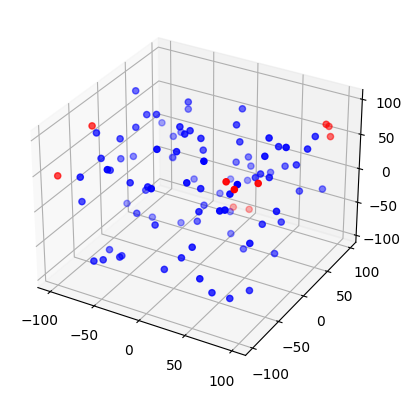

In [40]:
# Generamos 100 puntos aleatorios
puntos = np.random.uniform(-100, 100, (100, 3))

# Comprobamos si los puntos están dentro del sólido
dentro = np.zeros((100,), dtype=bool)
for i in range(100):
    punto = puntos[i]
    if np.linalg.norm(punto - punto_central) <= np.sum(np.array([a,b,c])):
        dentro[i] = True

# Visualizamos los puntos dentro y fuera del sólido
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(puntos[dentro, 0], puntos[dentro, 1], puntos[dentro, 2], color='blue')
ax.scatter(puntos[~dentro, 0], puntos[~dentro, 1], puntos[~dentro, 2], color='red')
plt.show()


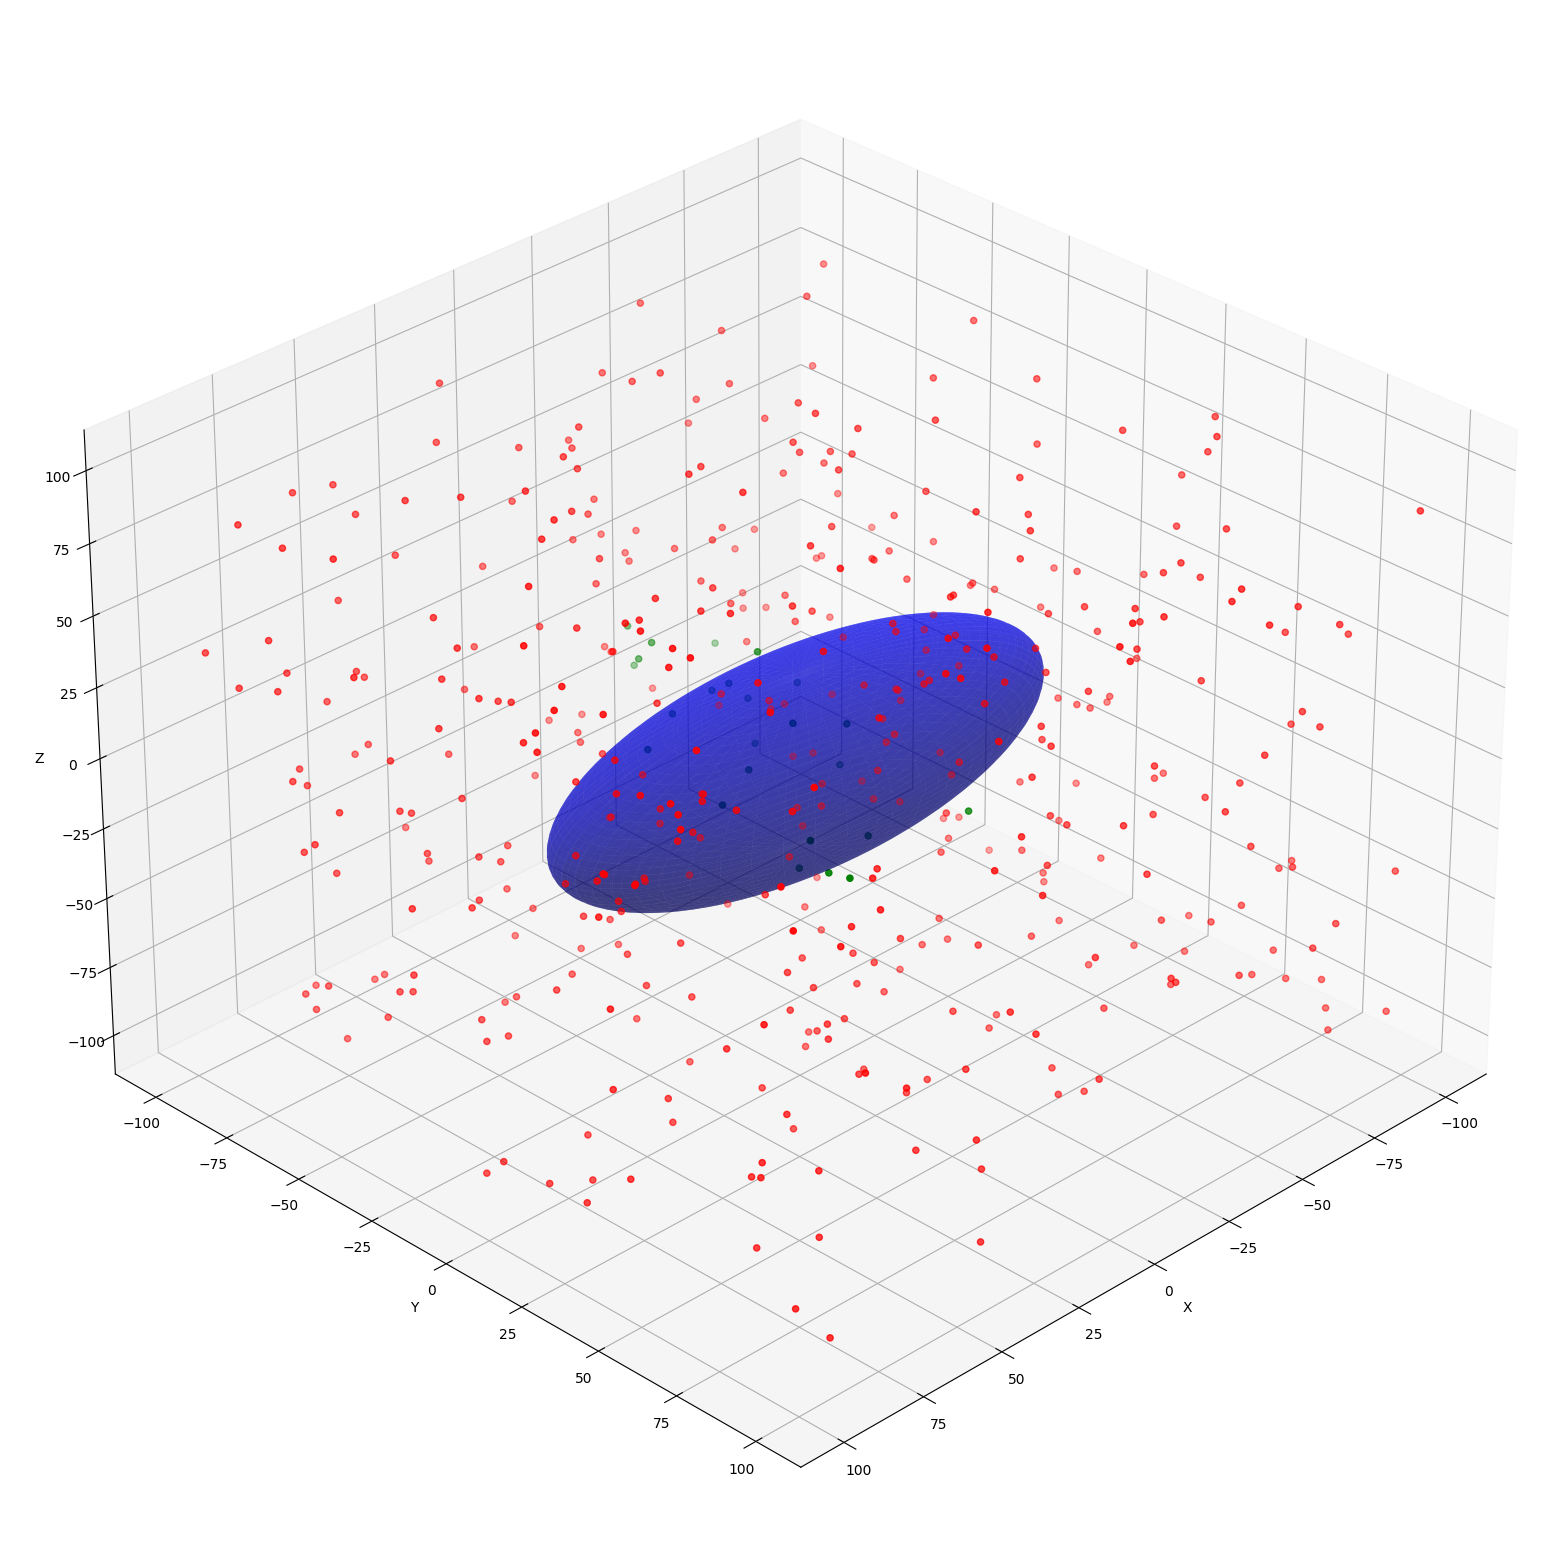

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generar elipsiode y rotarlo
a, b, c = 30, 75, 30
theta = np.deg2rad(90)
gen = 100

rot_mat = np.array([[np.cos(theta), -np.sin(theta), 0],
                    [np.sin(theta), np.cos(theta), 0],
                    [0, 0, 1]])

u = np.linspace(0, 2 * np.pi, gen)
v = np.linspace(0, np.pi, gen)

x = a * np.outer(np.cos(u), np.sin(v))
y = b * np.outer(np.sin(u), np.sin(v))
z = c * np.outer(np.ones(np.size(u)), np.cos(v))

x, y, z = np.dot(rot_mat, np.array([x.flatten(), y.flatten(), z.flatten()]))
x = x.reshape((gen, gen))
y = y.reshape((gen, gen))
z = z.reshape((gen, gen))

# Generar puntos y verificar si están dentro del elipsoide
num_puntos = 500
puntos = np.random.uniform(low=-100, high=100, size=(num_puntos, 3))

dentro = ((puntos[:, 0]**2)/(a**2) + (puntos[:, 1]**2)/(b**2) + (puntos[:, 2]**2)/(c**2)) <= 1

# Graficar elipsiode y puntos
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, color='b', alpha=0.5)

ax.scatter(puntos[dentro][:, 0], puntos[dentro][:, 1], puntos[dentro][:, 2], color='g')
ax.scatter(puntos[~dentro][:, 0], puntos[~dentro][:, 1], puntos[~dentro][:, 2], color='r')

# Configurar ejes y vista
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=30, azim=45)

plt.show()




In [53]:

factor=4


f,r,g=np.array([30,75,30])*factor

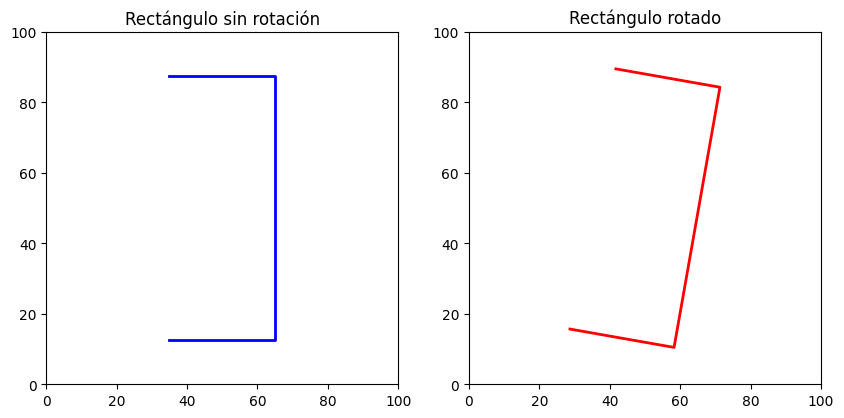

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Definir punto central del rectángulo
punto_central = np.array([50, 50])

# Definir dimensiones del rectángulo
ancho = 30
alto = 75

# Definir vértices del rectángulo sin rotación
vertices_rectangulo = np.array([[punto_central[0] - ancho/2, punto_central[1] - alto/2],
                                [punto_central[0] + ancho/2, punto_central[1] - alto/2],
                                [punto_central[0] + ancho/2, punto_central[1] + alto/2],
                                [punto_central[0] - ancho/2, punto_central[1] + alto/2]])

# Definir matriz de rotación de 30 grados
theta = np.radians(10)
matriz_rotacion = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])

# Rotar vértices del rectángulo
vertices_rectangulo_rotado = np.dot(vertices_rectangulo - punto_central, matriz_rotacion) + punto_central

# Visualizar rectángulos
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Rectángulo sin rotación
axs[0].plot(vertices_rectangulo[:, 0], vertices_rectangulo[:, 1], 'b-', lw=2)
axs[0].set_aspect('equal', 'box')
axs[0].set_xlim([0, 100])
axs[0].set_ylim([0, 100])
axs[0].set_title('Rectángulo sin rotación')

# Rectángulo rotado
axs[1].plot(vertices_rectangulo_rotado[:, 0], vertices_rectangulo_rotado[:, 1], 'r-', lw=2)
axs[1].set_aspect('equal', 'box')
axs[1].set_xlim([0, 100])
axs[1].set_ylim([0, 100])
axs[1].set_title('Rectángulo rotado')

plt.show()


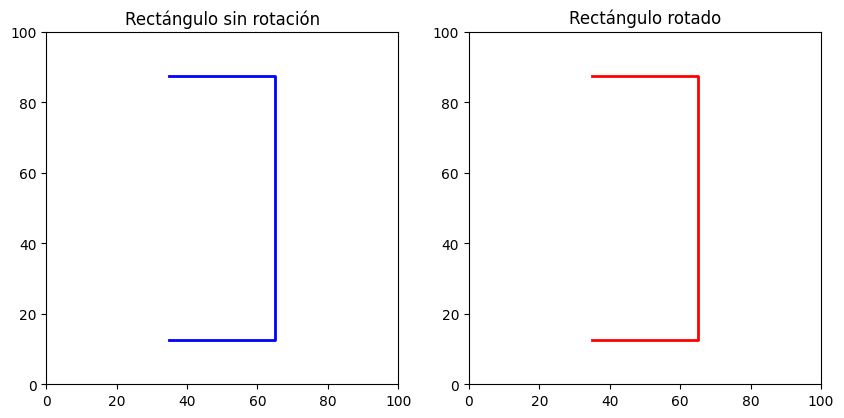

0


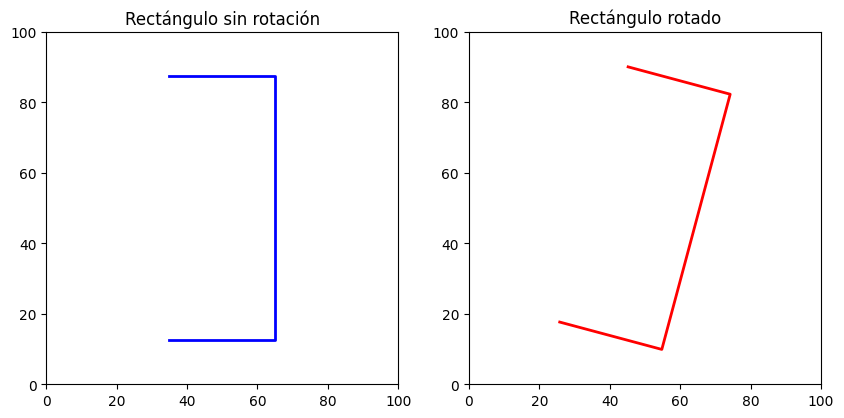

15


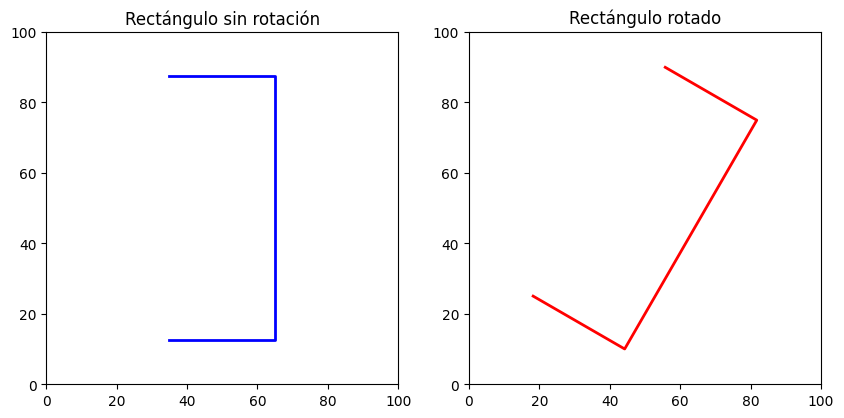

30


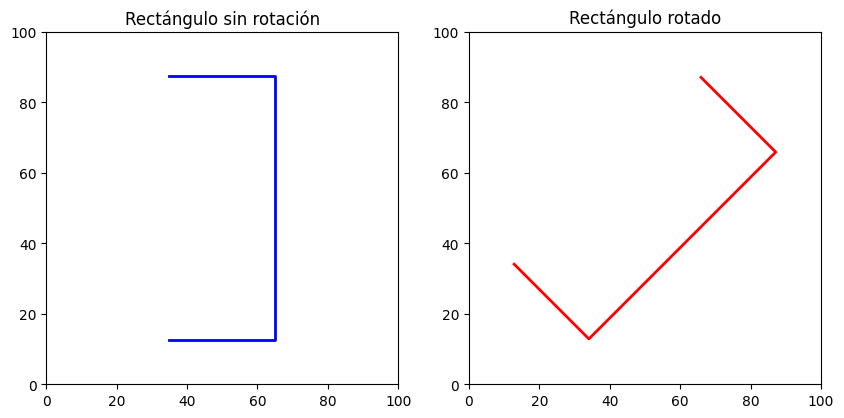

45


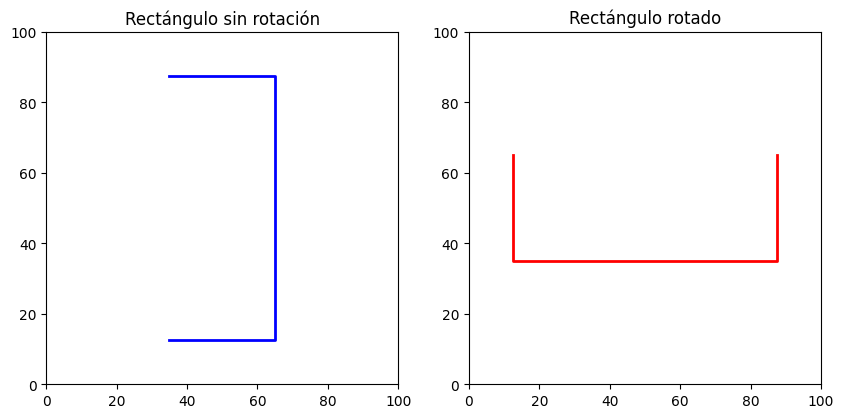

90


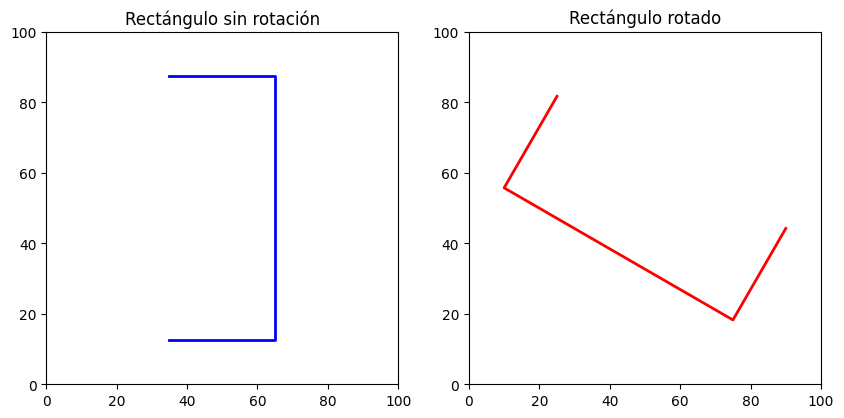

120


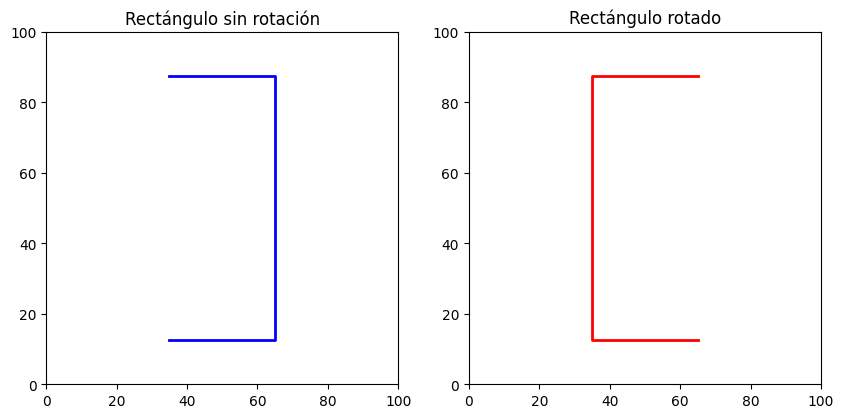

180


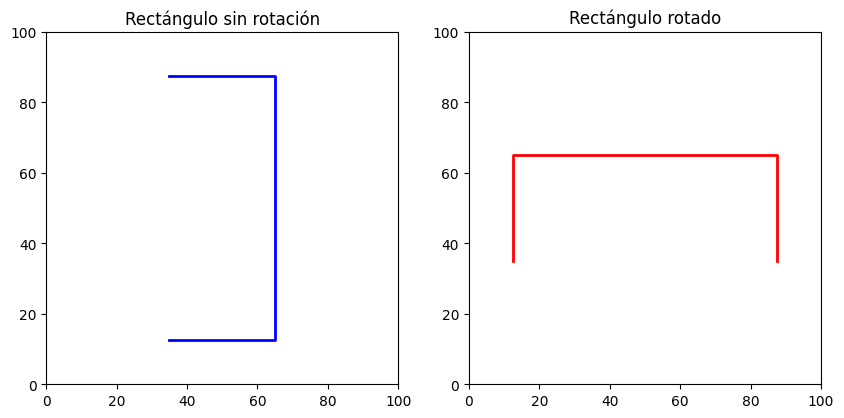

270


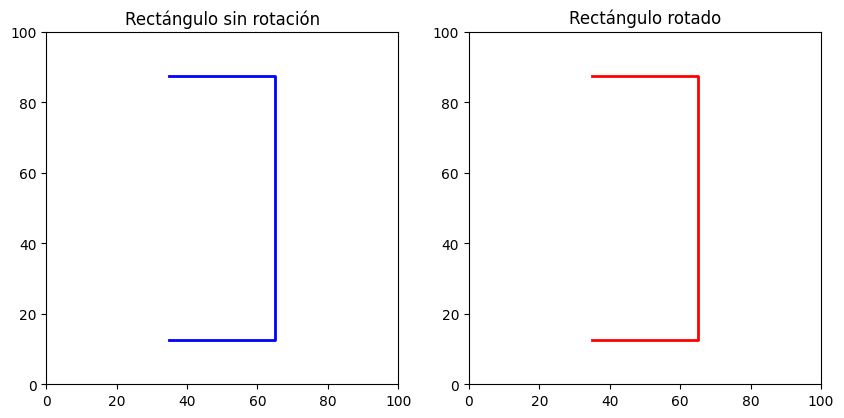

360


In [74]:
# Definir punto central del rectángulo
punto_central = np.array([50, 50])


for i in [0,15,30,45,90,120,180,270,360]:


    # Definir dimensiones del rectángulo
    ancho = 30
    alto = 75

    # Definir vértices del rectángulo sin rotación
    vertices_rectangulo = np.array([[punto_central[0] - ancho/2, punto_central[1] - alto/2],
                                    [punto_central[0] + ancho/2, punto_central[1] - alto/2],
                                    [punto_central[0] + ancho/2, punto_central[1] + alto/2],
                                    [punto_central[0] - ancho/2, punto_central[1] + alto/2]])

    # Definir matriz de rotación de 30 grados
    theta = np.radians(i)
    matriz_rotacion = np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta), np.cos(theta)]])

    # Rotar vértices del rectángulo
    vertices_rectangulo_rotado = np.dot(vertices_rectangulo - punto_central, matriz_rotacion) + punto_central

    # Visualizar rectángulos
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Rectángulo sin rotación
    axs[0].plot(vertices_rectangulo[:, 0], vertices_rectangulo[:, 1], 'b-', lw=2)
    axs[0].set_aspect('equal', 'box')
    axs[0].set_xlim([0, 100])
    axs[0].set_ylim([0, 100])
    axs[0].set_title('Rectángulo sin rotación')

    # Rectángulo rotado
    axs[1].plot(vertices_rectangulo_rotado[:, 0], vertices_rectangulo_rotado[:, 1], 'r-', lw=2)
    axs[1].set_aspect('equal', 'box')
    axs[1].set_xlim([0, 100])
    axs[1].set_ylim([0, 100])
    axs[1].set_title('Rectángulo rotado')

    plt.show()
    print(i)

IndexError: invalid index to scalar variable.

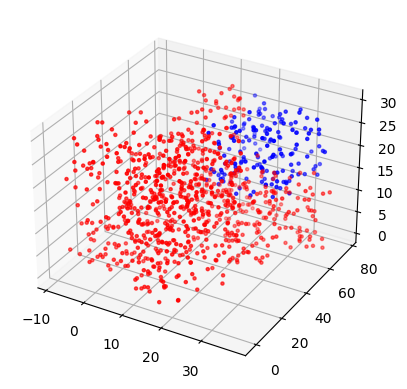

In [97]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# definir las dimensiones del paralelepípedo
x, y, z = 30, 75, 30

# definir la matriz de transformación para rotar en el eje z
theta = np.radians(15)  # convertir 15 grados a radianes
c, s = np.cos(theta), np.sin(theta)
R = np.array([[c, -s, 0], [s, c, 0], [0, 0, 1]])

# definir los vértices del paralelepípedo sin rotar
vertices = np.array([[0, 0, 0],
                     [x, 0, 0],
                     [x, y, 0],
                     [0, y, 0],
                     [0, 0, z],
                     [x, 0, z],
                     [x, y, z],
                     [0, y, z]])

# rotar los vértices del paralelepípedo
vertices_rotados = np.dot(vertices, R)

# trasladar los vértices del paralelepípedo al punto deseado
centro = np.array([x/2, y/2, z/2])
vertices_transladados = vertices_rotados + centro

# generar una nube de puntos
n_puntos = 1000
puntos = np.random.rand(n_puntos, 3) * np.array([x, y, z])  # puntos aleatorios dentro del cubo de dimensiones (x, y, z)

# aplicar la transformación de rotación a los puntos
puntos_rotados = np.dot(puntos - centro, R) + centro

# determinar si cada punto está dentro o fuera del paralelepípedo
dentro = []
fuera = []
for punto in puntos_rotados:
    # determinar si el punto está dentro del paralelepípedo rotado
    v1, v2, v3, v4, v5, v6, v7, v8 = vertices_transladados
    if ((v1[0] <= punto[0] <= v2[0]) and
        (v1[1] <= punto[1] <= v3[1]) and
        (v1[2] <= punto[2] <= v5[2])):
        dentro.append(punto)
    else:
        fuera.append(punto)

# graficar los puntos, el paralelepípedo original y el paralelepípedo rotado
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([p[0] for p in dentro], [p[1] for p in dentro], [p[2] for p in dentro], c='blue', marker='.')
ax.scatter([p[0] for p in fuera], [p[1] for p in fuera], [p[2] for p in fuera], c='red', marker='.')
ax.scatter([v[0] for v in vertices[:, 0]], [v[1] for v in vertices[:, 1]], 
            [v[2] for v in vertices[:, 2]], c='green', marker='s')
ax.scatter([v[0] for v in vertices_transladados[:, 0]], 
           [v[1] for v in vertices_transladados[:, 1]], 
           [v[2] for v in vertices_transladados[:, 2]], c='purple', marker='s')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0, x)
ax.set_ylim(0, y)
ax.set_zlim(0, z)
plt.show()




In [104]:
import math

# Punto original
x = 1
y = 1
z = 3

# Ángulo de rotación en grados
theta = 45

# Convertir el ángulo a radianes
theta = math.radians(theta)

# Calcular las nuevas coordenadas
x_rot = x * math.cos(theta) - y * math.sin(theta)
y_rot = x * math.sin(theta) + y * math.cos(theta)
z_rot = z

# Imprimir las nuevas coordenadas
print("Coordenadas originales:", (x, y, z))
print("Coordenadas rotadas:", (x_rot, y_rot, z_rot))


Coordenadas originales: (1, 1, 3)
Coordenadas rotadas: (0.0, 1.4142135623730951, 3)


,x,y,z
0,1,2,3
1,2,3,4
2,3,4,5


In [108]:
import pandas as pd
import math

# Crear un DataFrame con algunos puntos
df = pd.DataFrame({
    'x': [1, 2, 3],
    'y': [1, 2, 4],
    'z': [4, 4, 5]
})

# Definir la función de rotación
def rotate_point(row):
    x = row['x']
    y = row['y']
    z = row['z']
    theta = 45
    theta = math.radians(theta)
    x_rot = x * math.cos(theta) - y * math.sin(theta)
    y_rot = x * math.sin(theta) + y * math.cos(theta)
    z_rot = z
    return pd.Series({'x': x_rot, 'y': y_rot, 'z': z_rot})

# Aplicar la rotación a cada fila del DataFrame
df_rotated = df.apply(rotate_point, axis=1)

# Imprimir el DataFrame original y el DataFrame rotado
print("DataFrame original:\n", df)
print("DataFrame rotado:\n", df_rotated)

DataFrame original:
    x  y  z
0  1  1  4
1  2  2  4
2  3  4  5
DataFrame rotado:
           x         y    z
0  0.000000  1.414214  4.0
1  0.000000  2.828427  4.0
2 -0.707107  4.949747  5.0


In [110]:
import pandas as pd
import math

# Crear un DataFrame con algunos puntos y atributos
df = pd.DataFrame({
    'x': [1, 1, 3],
    'y': [2, 1, 4],
    'z': [3, 4, 5],
    'peso': [50, 60, 70],
    'talla': [1.65, 1.70, 1.75]
})

# Definir la función de rotación
def rotate_point(row):
    x = row['x']
    y = row['y']
    z = row['z']
    theta = 45
    theta = math.radians(theta)
    x_rot = x * math.cos(theta) - y * math.sin(theta)
    y_rot = x * math.sin(theta) + y * math.cos(theta)
    z_rot = z
    peso_rot = row['peso']
    talla_rot = row['talla']
    return pd.Series({'x': x_rot, 'y': y_rot, 'z': z_rot, 'peso': peso_rot, 'talla': talla_rot})

# Aplicar la rotación a cada fila del DataFrame
df_rotated = df.apply(rotate_point, axis=1)

# Imprimir el DataFrame original y el DataFrame rotado
print("DataFrame original:\n", df)
print("DataFrame rotado:\n", df_rotated)

DataFrame original:
    x  y  z  peso  talla
0  1  2  3    50   1.65
1  1  1  4    60   1.70
2  3  4  5    70   1.75
DataFrame rotado:
           x         y    z  peso  talla
0 -0.707107  2.121320  3.0  50.0   1.65
1  0.000000  1.414214  4.0  60.0   1.70
2 -0.707107  4.949747  5.0  70.0   1.75


In [117]:
import numpy as np
import pandas as pd

# Creamos un DataFrame de ejemplo con las coordenadas x, y, z
df = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [1, 2, 6, 8, 10],
    'z': [3, 3, 9, 12, 15]
})

# Definimos la matriz de rotación
theta = np.deg2rad(45) # 15 grados en radianes
rot_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])

# Multiplicamos la matriz de rotación por las coordenadas del DataFrame
rotated_coords = np.dot(df[['x', 'y', 'z']], rot_matrix)

# Creamos un nuevo DataFrame con las coordenadas rotadas
df_rotated = pd.DataFrame(rotated_coords, columns=['x_rot', 'y_rot', 'z_rot'])

# Concatenamos el DataFrame original y el DataFrame rotado
df_concat = pd.concat([df, df_rotated], axis=1)

# Mostramos el DataFrame con las coordenadas rotadas
print(df_concat)


   x   y   z      x_rot     y_rot  z_rot
0  1   1   3   1.414214  0.000000    3.0
1  2   2   3   2.828427  0.000000    3.0
2  3   6   9   6.363961  2.121320    9.0
3  4   8  12   8.485281  2.828427   12.0
4  5  10  15  10.606602  3.535534   15.0


In [123]:
# raiz de 2

import math
math.sqrt(2)*3


4.242640687119286

In [135]:
df_CLAG_MR_2022[['mid_x','mid_y','mid_z']]

,mid_x,mid_y,mid_z
COUNT,,,
2336,4072.0,4850.0,4200.0
2337,4074.0,4849.0,4197.0
2338,4075.0,4848.0,4194.0
2339,4076.0,4846.0,4192.0
2340,4077.0,4845.0,4189.0
...,...,...,...
390969,4235.0,5191.0,4185.0
390970,4235.0,5191.0,4182.0
390971,4235.0,5190.0,4178.0


In [136]:
rotated_coords = np.dot(df_CLAG_MR_2022[['mid_x','mid_y','mid_z']], rot_matrix)

In [137]:
df_rotated = pd.DataFrame(rotated_coords, columns=['x_rot', 'y_rot', 'z_rot'])

# Concatenamos el DataFrame original y el DataFrame rotado
df_concat = pd.concat([df_CLAG_MR_2022, df_rotated], axis=1)

In [138]:
df_concat

,mid_x,mid_y,mid_z,Ag_ppm_BESTEL,NBKRT,AG_SUBZONAS,HOLEID,CAP1_P,CPD1_P,CAP2_P,CPD2_P,CAP3_P,CPD3_P,CAP4_P,CPD4_P,CAP5_P,CPD5_P,CAP6_P,CPD6_P,AVG_SN_P,AVG_CN_P,PROP_SN_P,PROP_CN_P,EVAL_P,NCOMP_P,NXPAN_P,x_rot,y_rot,z_rot
2336,4072.0,4850.0,4200.0,25.0,32.0,42.0,A019,25.0,0.0,25.0,0.0,25.0,0.0,25.0,0.0,25.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5989.194437,766.503751,4036.0
2337,4074.0,4849.0,4197.0,40.0,31.0,42.0,A019,40.0,0.0,40.0,0.0,40.0,0.0,40.0,0.0,40.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5988.487330,764.382430,4034.0
2338,4075.0,4848.0,4194.0,36.0,31.0,42.0,A019,36.0,0.0,36.0,0.0,36.0,0.0,36.0,0.0,36.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5988.487330,762.968217,4032.0
2339,4076.0,4846.0,4192.0,45.0,31.0,42.0,A019,45.0,0.0,45.0,0.0,45.0,0.0,45.0,0.0,45.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5988.487330,760.139790,4030.0
2340,4077.0,4845.0,4189.0,45.0,31.0,42.0,A019,45.0,0.0,45.0,0.0,45.0,0.0,45.0,0.0,45.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5988.487330,758.725576,4027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6665.188519,675.994083,4185.0
4251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6665.188519,675.994083,4182.0
4252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6664.481413,675.286976,4178.0
4253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5960.910165,742.462120,4153.0


In [139]:
df_rotated

,x_rot,y_rot,z_rot
0,6308.806702,550.129076,4200.0
1,6309.513809,548.007755,4197.0
2,6309.513809,546.593542,4194.0
3,6308.806702,544.472222,4192.0
4,6308.806702,543.058008,4189.0
...,...,...,...
4250,6665.188519,675.994083,4185.0
4251,6665.188519,675.994083,4182.0
4252,6664.481413,675.286976,4178.0
4253,5960.910165,742.462120,4153.0


In [ ]:
df_CLAG_MR_2022[['mid_x','mid_y','mid_z']]

In [ ]:
df_CLAG_MR_2022

In [147]:
import numpy as np
import pandas as pd

# Creamos un DataFrame de ejemplo con las coordenadas x, y, z
df=df_CLAG_MR_2022[['mid_x','mid_y','mid_z']]

# Definimos la matriz de rotación


# Iteramos sobre el DataFrame y transformamos cada fila individualmente
for i, row in df.iterrows():
    rotated_coords = np.dot([row['mid_x'], row['mid_y'], row['mid_z']], rot_matrix)
    df.loc[i, 'x_rot'] = rotated_coords[0]
    df.loc[i, 'y_rot'] = rotated_coords[1]
    df.loc[i, 'z_rot'] = rotated_coords[2]

# Mostramos el DataFrame con las coordenadas rotadas
print(df)


C:\Users\LZ8952\AppData\Local\Temp\ipykernel_2596\1654930890.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i, 'x_rot'] = rotated_coords[0]
C:\Users\LZ8952\AppData\Local\Temp\ipykernel_2596\1654930890.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i, 'y_rot'] = rotated_coords[1]
C:\Users\LZ8952\AppData\Local\Temp\ipykernel_2596\1654930890.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

         mid_x   mid_y   mid_z        x_rot       y_rot   z_rot
COUNT                                                          
2336    4072.0  4850.0  4200.0  6308.806702  550.129076  4200.0
2337    4074.0  4849.0  4197.0  6309.513809  548.007755  4197.0
2338    4075.0  4848.0  4194.0  6309.513809  546.593542  4194.0
2339    4076.0  4846.0  4192.0  6308.806702  544.472222  4192.0
2340    4077.0  4845.0  4189.0  6308.806702  543.058008  4189.0
...        ...     ...     ...          ...         ...     ...
390969  4235.0  5191.0  4185.0  6665.188519  675.994083  4185.0
390970  4235.0  5191.0  4182.0  6665.188519  675.994083  4182.0
390971  4235.0  5190.0  4178.0  6664.481413  675.286976  4178.0
394849  3690.0  4740.0  4153.0  5960.910165  742.462120  4153.0
394850  3691.0  4739.0  4149.0  5960.910165  741.047907  4149.0

[4255 rows x 6 columns]


In [148]:
for i, row in df.iterrows():
    print(i)

2336
2337
2338
2339
2340
2341
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2865
2866
2867
3751
4274
4275
4276
4277
4278
4279
4280
4281
4282
4283
4284
4285
4286
4287
4288
4289
4290
6459
6460
6461
6462
6463
6464
6472
6473
6474
6475
6476
6477
6478
6479
6480
6481
6482
6483
6484
6485
6486
6487
6488
6489
6490
6491
6583
6584
6585
6586
6587
6588
6589
6590
6591
6592
6593
6594
6595
6596
6597
6598
6599
6600
6601
6602
6603
6604
6605
6606
6607
6608
6609
6610
6611
6612
6613
6614
6615
6616
6617
6618
6622
6623
6624
6625
6626
6627
7047
7048
7049
7052
7164
7173
7174
7175
7176
7177
7195
7196
7197
7198
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7663
7664
7665
7760
7761
7762
7765
8060
8061
8062
8063
8064
8065
8066
8067
8068
8069
8070
8071
8072
8073
8074
8075
8076
8077
8078
8079
8080
8081
8082
8084
8085
8086
8087
8088
8089
8090
8091
8092
8093
8094
8095
8096
8097
8098
8100
8101
8102
8103
8104
8211
8223
9335
9336
9337
9338


In [150]:
df_CLAG_MR_2022

,mid_x,mid_y,mid_z,Ag_ppm_BESTEL,NBKRT,AG_SUBZONAS,HOLEID,x_rot,y_rot,z_rot,CAP1_P,CPD1_P,CAP2_P,CPD2_P,CAP3_P,CPD3_P,CAP4_P,CPD4_P,CAP5_P,CPD5_P,CAP6_P,CPD6_P,AVG_SN_P,AVG_CN_P,PROP_SN_P,PROP_CN_P,EVAL_P,NCOMP_P,NXPAN_P
COUNT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2336,4072.0,4850.0,4200.0,25.0,32,42,A019,0,0,0,25.0,0,25.0,0,25.0,0,25.0,0,25.0,0,25.0,0,0,0,0,0,0,0,0
2337,4074.0,4849.0,4197.0,40.0,31,42,A019,0,0,0,40.0,0,40.0,0,40.0,0,40.0,0,40.0,0,40.0,0,0,0,0,0,0,0,0
2338,4075.0,4848.0,4194.0,36.0,31,42,A019,0,0,0,36.0,0,36.0,0,36.0,0,36.0,0,36.0,0,36.0,0,0,0,0,0,0,0,0
2339,4076.0,4846.0,4192.0,45.0,31,42,A019,0,0,0,45.0,0,45.0,0,45.0,0,45.0,0,45.0,0,45.0,0,0,0,0,0,0,0,0
2340,4077.0,4845.0,4189.0,45.0,31,42,A019,0,0,0,45.0,0,45.0,0,45.0,0,45.0,0,45.0,0,45.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390969,4235.0,5191.0,4185.0,7.0,31,42,A913,0,0,0,7.0,0,7.0,0,7.0,0,7.0,0,7.0,0,7.0,0,0,0,0,0,0,0,0
390970,4235.0,5191.0,4182.0,7.0,31,42,A913,0,0,0,7.0,0,7.0,0,7.0,0,7.0,0,7.0,0,7.0,0,0,0,0,0,0,0,0
390971,4235.0,5190.0,4178.0,8.0,31,42,A913,0,0,0,8.0,0,8.0,0,8.0,0,8.0,0,8.0,0,8.0,0,0,0,0,0,0,0,0


In [ ]:


df=df_CLAG_MR_2022[['mid_x','mid_y','mid_z']]

# Definimos la matriz de rotación
theta = np.deg2rad(45) # 15 grados en radianes
rot_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])

In [165]:
theta = np.deg2rad(45) # 15 grados en radianes
rot_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])

for x,row in df_CLAG_MR_2022.iterrows():
    print(x)
    rotated_coords = np.dot([row['mid_x'], row['mid_y'], row['mid_z']], rot_matrix)

    print(rotated_coords[0])
    print(rotated_coords[1])
    print(rotated_coords[2])

    print(" ")
    print(row['x_rot'])


    row['x_rot']=rotated_coords[0]
    row['y_rot']=rotated_coords[1]
    row['z_rot']=rotated_coords[2]
    print(row['x_rot'])


    


    print(" ")




2336
6308.806701746377
550.1290757631341
4200.0
 
0
6308.806701746377
 
2337
6309.513808527564
548.0077554195741
4197.0
 
0
6309.513808527564
 
2338
6309.513808527565
546.5935418572012
4194.0
 
0
6309.513808527565
 
2339
6308.806701746377
544.4722215136417
4192.0
 
0
6308.806701746377
 
2340
6308.806701746377
543.0580079512683
4189.0
 
0
6308.806701746377
 
2341
6308.806701746378
541.6437943888955
4187.0
 
0
6308.806701746378
 
2843
6317.291983120616
647.7098115668773
4200.0
 
0
6317.291983120616
 
2844
6317.291983120616
647.7098115668773
4197.0
 
0
6317.291983120616
 
2845
6317.291983120616
647.7098115668773
4193.0
 
0
6317.291983120616
 
2846
6317.291983120616
647.7098115668773
4190.0
 
0
6317.291983120616
 
2847
6317.291983120616
647.7098115668773
4187.0
 
0
6317.291983120616
 
2848
6317.291983120616
647.7098115668773
4184.0
 
0
6317.291983120616
 
2849
6317.291983120616
647.7098115668773
4181.0
 
0
6317.291983120616
 
2850
6317.291983120616
647.7098115668773
4178.0
 
0
6317.2919831

In [166]:
df_CLAG_MR_2022

,mid_x,mid_y,mid_z,Ag_ppm_BESTEL,NBKRT,AG_SUBZONAS,HOLEID,x_rot,y_rot,z_rot,CAP1_P,CPD1_P,CAP2_P,CPD2_P,CAP3_P,CPD3_P,CAP4_P,CPD4_P,CAP5_P,CPD5_P,CAP6_P,CPD6_P,AVG_SN_P,AVG_CN_P,PROP_SN_P,PROP_CN_P,EVAL_P,NCOMP_P,NXPAN_P
COUNT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2336,4072.0,4850.0,4200.0,25.0,32,42,A019,0,0,0,25.0,0,25.0,0,25.0,0,25.0,0,25.0,0,25.0,0,0,0,0,0,0,0,0
2337,4074.0,4849.0,4197.0,40.0,31,42,A019,0,0,0,40.0,0,40.0,0,40.0,0,40.0,0,40.0,0,40.0,0,0,0,0,0,0,0,0
2338,4075.0,4848.0,4194.0,36.0,31,42,A019,0,0,0,36.0,0,36.0,0,36.0,0,36.0,0,36.0,0,36.0,0,0,0,0,0,0,0,0
2339,4076.0,4846.0,4192.0,45.0,31,42,A019,0,0,0,45.0,0,45.0,0,45.0,0,45.0,0,45.0,0,45.0,0,0,0,0,0,0,0,0
2340,4077.0,4845.0,4189.0,45.0,31,42,A019,0,0,0,45.0,0,45.0,0,45.0,0,45.0,0,45.0,0,45.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390969,4235.0,5191.0,4185.0,7.0,31,42,A913,0,0,0,7.0,0,7.0,0,7.0,0,7.0,0,7.0,0,7.0,0,0,0,0,0,0,0,0
390970,4235.0,5191.0,4182.0,7.0,31,42,A913,0,0,0,7.0,0,7.0,0,7.0,0,7.0,0,7.0,0,7.0,0,0,0,0,0,0,0,0
390971,4235.0,5190.0,4178.0,8.0,31,42,A913,0,0,0,8.0,0,8.0,0,8.0,0,8.0,0,8.0,0,8.0,0,0,0,0,0,0,0,0


In [167]:
for i, row in df_CLAG_MR_2022.iterrows():
    rotated_coords = np.dot([row['mid_x'], row['mid_y'], row['mid_z']], rot_matrix)
    
    df_CLAG_MR_2022.at[i, 'x_rot'] = rotated_coords[0]
    df_CLAG_MR_2022.at[i, 'y_rot'] = rotated_coords[1]
    df_CLAG_MR_2022.at[i, 'z_rot'] = rotated_coords[2]


In [168]:
df_CLAG_MR_2022

,mid_x,mid_y,mid_z,Ag_ppm_BESTEL,NBKRT,AG_SUBZONAS,HOLEID,x_rot,y_rot,z_rot,CAP1_P,CPD1_P,CAP2_P,CPD2_P,CAP3_P,CPD3_P,CAP4_P,CPD4_P,CAP5_P,CPD5_P,CAP6_P,CPD6_P,AVG_SN_P,AVG_CN_P,PROP_SN_P,PROP_CN_P,EVAL_P,NCOMP_P,NXPAN_P
COUNT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2336,4072.0,4850.0,4200.0,25.0,32,42,A019,6308.806702,550.129076,4200,25.0,0,25.0,0,25.0,0,25.0,0,25.0,0,25.0,0,0,0,0,0,0,0,0
2337,4074.0,4849.0,4197.0,40.0,31,42,A019,6309.513809,548.007755,4197,40.0,0,40.0,0,40.0,0,40.0,0,40.0,0,40.0,0,0,0,0,0,0,0,0
2338,4075.0,4848.0,4194.0,36.0,31,42,A019,6309.513809,546.593542,4194,36.0,0,36.0,0,36.0,0,36.0,0,36.0,0,36.0,0,0,0,0,0,0,0,0
2339,4076.0,4846.0,4192.0,45.0,31,42,A019,6308.806702,544.472222,4192,45.0,0,45.0,0,45.0,0,45.0,0,45.0,0,45.0,0,0,0,0,0,0,0,0
2340,4077.0,4845.0,4189.0,45.0,31,42,A019,6308.806702,543.058008,4189,45.0,0,45.0,0,45.0,0,45.0,0,45.0,0,45.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390969,4235.0,5191.0,4185.0,7.0,31,42,A913,6665.188519,675.994083,4185,7.0,0,7.0,0,7.0,0,7.0,0,7.0,0,7.0,0,0,0,0,0,0,0,0
390970,4235.0,5191.0,4182.0,7.0,31,42,A913,6665.188519,675.994083,4182,7.0,0,7.0,0,7.0,0,7.0,0,7.0,0,7.0,0,0,0,0,0,0,0,0
390971,4235.0,5190.0,4178.0,8.0,31,42,A913,6664.481413,675.286976,4178,8.0,0,8.0,0,8.0,0,8.0,0,8.0,0,8.0,0,0,0,0,0,0,0,0
